In [1]:
import json

eval_PATH = 'data/test.json'
train_PATH = 'data/train.json'
val_PATH = 'data/validation.json'
vsval_PATH = 'data/very_small_validation.json'
pred_PATH = 'data_pred/main-pred-2enc-2dec.json'

e_trim = 100000
t_trim = 100000
v_trim = 100000

with open(eval_PATH, 'r') as f:
  eval_data = json.load(f)[:e_trim]
with open(train_PATH, 'r') as f:
  train_data = json.load(f)[:t_trim]
with open(val_PATH, 'r') as f:
  val_data = json.load(f)[:v_trim]
with open(pred_PATH, 'r') as f:
  pred_data = json.load(f)

In [2]:
from utils.transforms import construct_token_transform
token_transform = construct_token_transform()

/Users/batuel/Documents/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Decoding Methods
pred_data.keys()

dict_keys(['Greedy', 'Temperature 0.5', 'Temperature 1 (Unbiased)'])

In [4]:
eval_articles = [example['article'] for example in eval_data]
eval_summaries = [example['summary'] for example in eval_data]
train_articles = [example['article'] for example in train_data]
train_summaries = [example['summary'] for example in train_data]
val_articles = [example['article'] for example in val_data]
val_summaries = [example['summary'] for example in val_data]

pred_articles_grdy = [example['article'] for example in pred_data['Greedy']]
pred_summaries_grdy = [example['summary'] for example in pred_data['Greedy']]
pred_articles_unb = [example['article'] for example in pred_data['Temperature 1 (Unbiased)']]
pred_summaries_unb = [example['summary'] for example in pred_data['Temperature 1 (Unbiased)']]
pred_articles_temp = [example['article'] for example in pred_data['Temperature 0.5']]
pred_summaries_temp = [example['summary'] for example in pred_data['Temperature 0.5']]

In [8]:
tok_eval_articles = [token_transform(example) for example in eval_articles]
tok_eval_summaries = [token_transform(example) for example in eval_summaries]
tok_train_articles = [token_transform(example) for example in train_articles]
tok_train_summaries = [token_transform(example) for example in train_summaries]
tok_val_articles = [token_transform(example) for example in val_articles]
tok_val_summaries = [token_transform(example) for example in val_summaries]

tok_pred_articles_grdy = [token_transform(example) for example in pred_articles_grdy]
tok_pred_summaries_grdy = [token_transform(example) for example in pred_summaries_grdy]
tok_pred_articles_unb = [token_transform(example) for example in pred_articles_unb]
tok_pred_summaries_unb = [token_transform(example) for example in pred_summaries_unb]
tok_pred_articles_temp = [token_transform(example) for example in pred_articles_temp]
tok_pred_summaries_temp = [token_transform(example) for example in pred_summaries_temp]

eval_art_len = [len(art) for art in tok_eval_articles]
eval_sum_len = [len(sum) for sum in tok_eval_summaries]
train_art_len = [len(art) for art in tok_train_articles]
train_sum_len = [len(sum) for sum in tok_train_summaries]
val_art_len = [len(art) for art in tok_val_articles]
val_sum_len = [len(sum) for sum in tok_val_summaries]

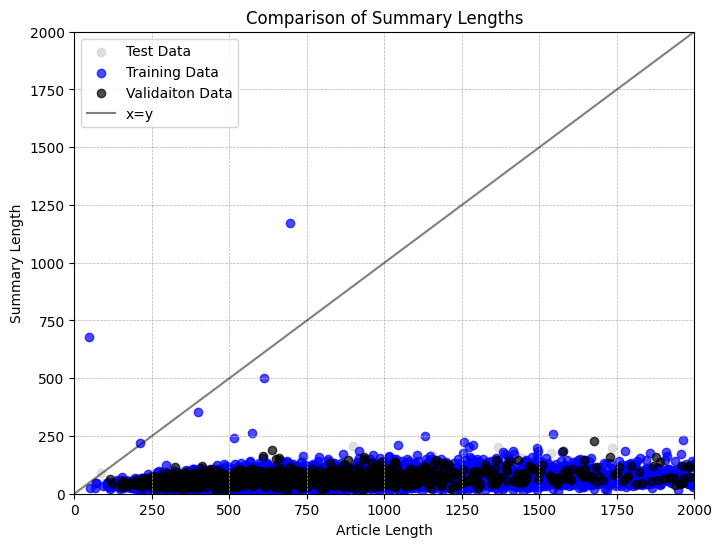

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Creating a more aesthetically pleasing graph
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#d3d3d3", "#0000ff", "#000000"]  # More visually appealing colors
markers = ['o', 'o', 'o']  # Different markers for each scatter plot

# Scatter plots
ax.scatter(eval_art_len, eval_sum_len, label='Test Data', color=colors[0], marker=markers[0], alpha=0.7)
ax.scatter(train_art_len, train_sum_len, label='Training Data', color=colors[1], marker=markers[1], alpha=0.7)
ax.scatter(val_art_len, val_sum_len, label='Validaiton Data', color=colors[2], marker=markers[2], alpha=0.7)

# Line plot for x=y
x = np.linspace(0, 2000, 100)
y = x
ax.plot(x, y, color='black', label='x=y', alpha=0.5)

# Setting limits and labels
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
ax.set_ylabel('Summary Length')
ax.set_xlabel('Article Length')

# Adding grid, legend, and title
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc="upper left")
ax.set_title('Comparison of Summary Lengths')

plt.show()

In [11]:
# identify the outliers
for i in range(len(train_art_len)):
    if train_art_len[i] < train_sum_len[i]:
        print(i, train_art_len[i], train_sum_len[i])

1469 695 1174
1814 47 679
9258 211 218


In [12]:
pred_art_len_grdy = [len(art) for art in tok_pred_articles_grdy]
pred_sum_len_grdy = [len(sum) for sum in tok_pred_summaries_grdy]

pred_art_len_unb = [len(art) for art in tok_pred_articles_unb]
pred_sum_len_unb = [len(sum) for sum in tok_pred_summaries_unb]

pred_art_len_temp = [len(art) for art in tok_pred_articles_temp]
pred_sum_len_temp = [len(sum) for sum in tok_pred_summaries_temp]

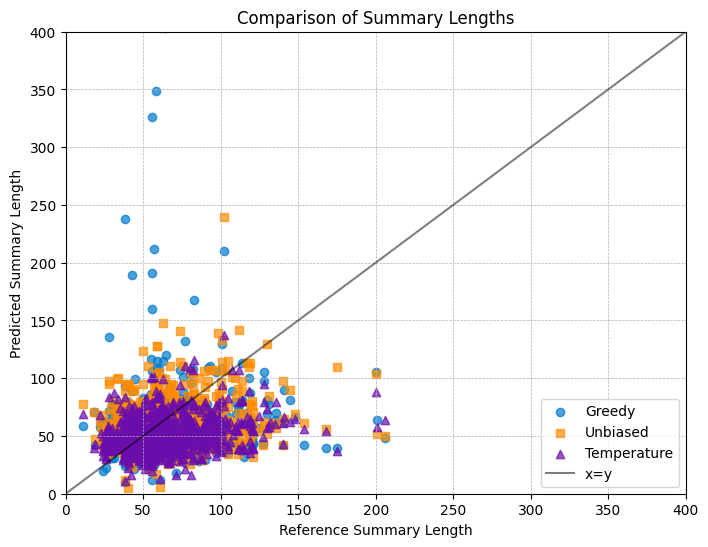

In [13]:
# Creating a more aesthetically pleasing graph
fig, ax = plt.subplots(figsize=(8, 6))

colors = ['#007acc', '#ff8c00', '#6a0dad']  # More visually appealing colors
markers = ['o', 's', '^']  # Different markers for each scatter plot

# Scatter plots
ax.scatter(eval_sum_len, pred_sum_len_grdy, label='Greedy', color=colors[0], marker=markers[0], alpha=0.7)
ax.scatter(eval_sum_len, pred_sum_len_unb, label='Unbiased', color=colors[1], marker=markers[1], alpha=0.7)
ax.scatter(eval_sum_len, pred_sum_len_temp, label='Temperature', color=colors[2], marker=markers[2], alpha=0.7)

# Line plot for x=y
x = np.linspace(0, 400, 100)
y = x
ax.plot(x, y, color='black', label='x=y', alpha=0.5)

# Setting limits and labels
ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
ax.set_ylabel('Predicted Summary Length')
ax.set_xlabel('Reference Summary Length')

# Adding grid, legend, and title
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc="lower right")
ax.set_title('Comparison of Summary Lengths')

plt.show()

In [14]:
np.mean(val_sum_len), np.mean(pred_sum_len_grdy),np.mean(pred_sum_len_unb),np.mean(pred_sum_len_temp)

(66.481, 53.732, 57.008, 50.718)